# **Week 1:** Data Discovery & Exploration
#### June 20, 2023
---------------- 

This notebook is an exercise in Exploratory Data Analysis (EDA) using a dataset of credit card transactions (`transactions.txt`). Our goal is fraud detection and prevention, and we will accomplish this goal through analytics on this dataset.

[Link to Kaggle Dataset](https://www.kaggle.com/code/kishanpahadiya/fraud-detection)

Install necessary Python packages: NumPy, Pandas, Seaborn

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns

Read the `transactions.txt` JSON file into a Pandas Dataframe, and call it `df`. If you want to visualize the data in Excel, uncomment the second line to ouptut the data to a CSV.

In [53]:
df = pd.read_json('transactions.txt', lines=True)
# df.to_csv('transactions.csv')

Output the head, or top 5 rows, of the dataframe. Scroll through the dataset preview to see the column names and values. This dataset is a record of credit card transactions for various accounts/customers. 

In [54]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


Output the shape of the dataframe (# of rows, # of columns). 

In [55]:
df.shape

(786363, 29)

There are 29 columns in the dataset. Output the names of the columns in the dataframe. Read through the column names and start thinking about which columns might be interesting to investigate for fraud.

In [56]:
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

As a part of EDA, we need to determine the types of each column ("variable"). Output the data types of the variables, and start to categorize each variable as categorical, binary, or continuous (**Note that `object` can be a variety of types).

In [57]:
df.dtypes

accountNumber                 int64
customerId                    int64
creditLimit                   int64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                       int64
enteredCVV                    int64
cardLast4Digits               int64
transactionType              object
echoBuffer                   object
currentBalance              float64
merchantCity                 object
merchantState                object
merchantZip                  object
cardPresent                    bool
posOnPremises                object
recurringAuthInd             object
expirationDateKeyInMatch    

Output the number of unique values for each variable. This will further clarify how to categorize each variable as categorical, binary, or continuous. 

In [58]:
df.nunique()

accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              521915
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       5
merchantCountryCode              5
posEntryMode                     6
posConditionCode                 4
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5245
transactionType                  4
echoBuffer                       1
currentBalance              487318
merchantCity                     1
merchantState                    1
merchantZip                      1
cardPresent                      2
posOnPremises                    1
recurringAuthInd                 1
expirationDateKeyInMatch         2
isFraud             

It is important to note that 6 columns (`echoBuffer`, `merchantCity`, `merchantState`, `merchantZip`, `posOnPremises`, `recurringAuthInd`) only have 1 unique value. Look back at the dataset preview above, and you'll see these columns are empty. Let's drop them from the dataframe, since they are not useful for our analysis.

In [59]:
df = df.drop(['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd'] , axis=1)

Let's print out the head and shape of the dataset once more to make sure the columns were dropped correctly.

In [60]:
df.head()
df.shape

(786363, 23)

Output basic statistics for each continuous variable as part of your EDA process. Skim the numbers to see if anything sticks out to you.

In [61]:
df[['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']].describe()

,creditLimit,availableMoney,transactionAmount,currentBalance
count,786363.000000,786363.000000,786363.000000,786363.000000
mean,10759.464459,6250.725369,136.985791,4508.739089
std,11636.174890,8880.783989,147.725569,6457.442068
min,250.000000,-1005.630000,0.000000,0.000000
25%,5000.000000,1077.420000,33.650000,689.910000
50%,7500.000000,3184.860000,87.900000,2451.760000
75%,15000.000000,7500.000000,191.480000,5291.095000
max,50000.000000,50000.000000,2011.540000,47498.810000


Output boxplots for each continuous variable to get a quick overview of the distributions of the variables. Notice any outliers that might be interesting to look into later.

<Axes: ylabel='creditLimit'>

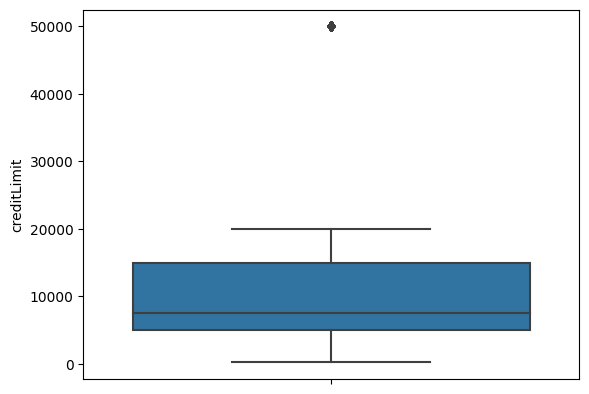

In [62]:
# creditLimit
sns.boxplot(data=df, y='creditLimit')

<Axes: ylabel='availableMoney'>

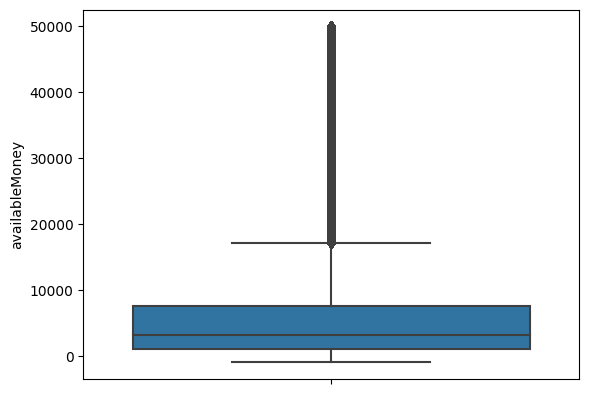

In [63]:
# availableMoney
sns.boxplot(data=df, y='availableMoney')

<Axes: ylabel='transactionAmount'>

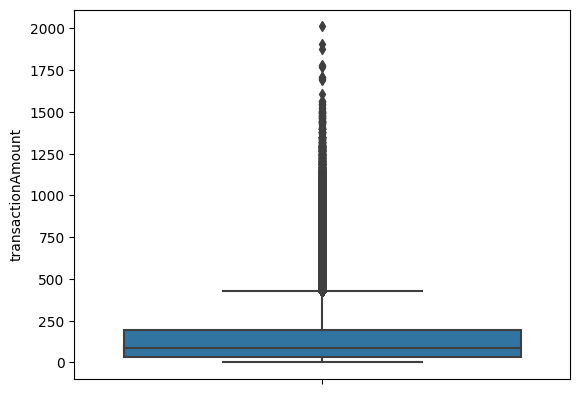

In [64]:
# transactionAmount
sns.boxplot(data=df, y='transactionAmount')

<Axes: ylabel='currentBalance'>

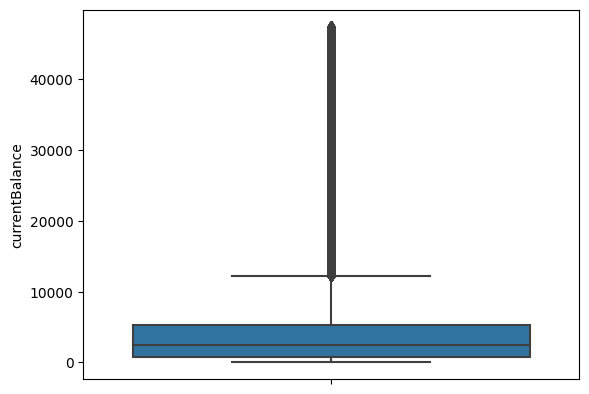

In [65]:
# currentBalance
sns.boxplot(data=df, y='currentBalance')

OPTIONAL: Maybe we want to check the distributions of currentBalance, but across different countries for the credit card merchant. Do you notice any differences in distributions between countries? Is anything strange about the variable merchantCountryCode across the x-axis? What does this tell you about the next steps for data processing?

<Axes: xlabel='merchantCountryCode', ylabel='currentBalance'>

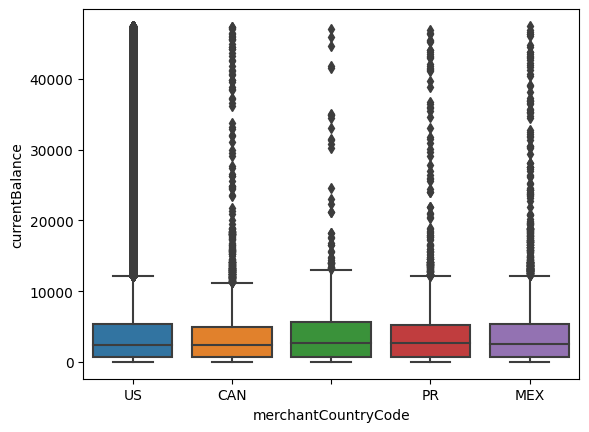

In [66]:
sns.boxplot(data=df, x='merchantCountryCode', y='currentBalance')